<a href="https://colab.research.google.com/github/Series-Parallel/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import numpy as np
import pandas as pd

In [298]:
df = pd.read_csv("telecom_customer_churn.csv")

In [299]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [300]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [302]:
df['Customer Status'].value_counts()

,count
Customer Status,
Stayed,4720
Churned,1869
Joined,454


In [303]:
new_df = df.drop(['City','Zip Code','Latitude','Longitude','Customer ID'], axis=1)

In [304]:
new_df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [305]:
new_df.drop(['Offer'], axis=1, inplace=True)

In [306]:
new_df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,Female,37,Yes,0,2,9,Yes,42.39,No,Yes,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,0,9,Yes,10.69,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,0,4,Yes,33.65,No,Yes,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,1,13,Yes,27.82,No,Yes,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,3,3,Yes,7.38,No,Yes,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


replaced nan values in internet type to No internet

In [307]:
new_df['Internet Type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', nan], dtype=object)

In [308]:
new_df['Internet Type'].fillna('No Internet', inplace=True)

<ipython-input-308-cdd0973ce20b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Internet Type'].fillna('No Internet', inplace=True)


In [309]:
new_df['Internet Type'].unique()

array(['Cable', 'Fiber Optic', 'DSL', 'No Internet'], dtype=object)

similarly for online security we will do no internnet cuz it there was no intenrnet thats why there is no online security and there are other fields too just like that, which are dependent on internet!

In [310]:
new_df['Online Security'].unique()

array(['No', 'Yes', nan], dtype=object)

In [311]:
new_df['Online Backup'].unique()

array(['Yes', 'No', nan], dtype=object)

In [312]:
new_df['Device Protection Plan'].unique()

array(['No', 'Yes', nan], dtype=object)

In [313]:
new_df['Premium Tech Support'].unique()

array(['Yes', 'No', nan], dtype=object)

In [314]:
new_df['Streaming TV'].unique()

array(['Yes', 'No', nan], dtype=object)

In [315]:
new_df['Streaming Movies'].unique()

array(['No', 'Yes', nan], dtype=object)

In [316]:
new_df['Streaming Music'].unique()

array(['No', 'Yes', nan], dtype=object)

In [317]:
new_df['Unlimited Data'].unique()

array(['Yes', 'No', nan], dtype=object)

In [318]:
new_df['Online Security'] = new_df['Online Security'].fillna('No Internet')
new_df['Online Backup'] = new_df['Online Backup'].fillna('No Internet')
new_df['Device Protection Plan'] = new_df['Device Protection Plan'].fillna('No Internet')
new_df['Premium Tech Support'] = new_df['Premium Tech Support'].fillna('No Internet')
new_df['Streaming TV'] = new_df['Streaming TV'].fillna('No Internet')
new_df['Streaming Movies'] = new_df['Streaming Movies'].fillna('No Internet')
new_df['Streaming Music'] = new_df['Streaming Music'].fillna('No Internet')
new_df['Unlimited Data'] = new_df['Unlimited Data'].fillna('No Internet')

In [319]:
new_df['Unlimited Data'].unique()

array(['Yes', 'No', 'No Internet'], dtype=object)

In [320]:
new_df.isnull().sum()

,0
Gender,0
Age,0
Married,0
Number of Dependents,0
Number of Referrals,0
Tenure in Months,0
Phone Service,0
Avg Monthly Long Distance Charges,682
Multiple Lines,682
Internet Service,0


In [321]:
new_df['Avg Monthly GB Download'].unique()

array([16., 10., 30.,  4., 11., 73., 14.,  7., 21., 59., 19., 12., 20.,
       22., 17.,  9., nan, 52., 57., 51., 41., 23., 27.,  2., 69., 53.,
       15., 29., 85., 28., 18., 48., 25., 26.,  8.,  6.,  5., 13., 75.,
       82., 24., 76., 47., 71., 58., 42.,  3., 56., 46., 39.])

In [322]:
new_df['Avg Monthly GB Download'] = new_df['Avg Monthly GB Download'].fillna(0)

In [323]:
new_df['Avg Monthly Long Distance Charges'].unique()

array([42.39, 10.69, 33.65, ..., 10.04, 25.59,  2.01])

In [324]:
new_df['Avg Monthly Long Distance Charges'] = new_df['Avg Monthly Long Distance Charges'].fillna(new_df['Avg Monthly Long Distance Charges'].median())

In [325]:
new_df['Avg Monthly Long Distance Charges'].unique()

array([42.39, 10.69, 33.65, ..., 10.04, 25.59,  2.01])

In [326]:
new_df['Customer Status'].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

In [327]:
new_df['Churn'] = new_df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

In [328]:
new_df = new_df.drop(['Customer Status'], axis=1)

In [329]:
new_df['Churn'].unique()

array([0, 1])

In [330]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     6361 non-null   object 
 9   Internet Service                   7043 non-null   object 
 10  Internet Type                      7043 non-null   object 
 11  Avg Monthly GB Download            7043 non-null   float

In [331]:
binary_cols = ['Married', 'Phone Service', 'Paperless Billing']
for col in binary_cols:
    new_df[col] = new_df[col].map({'Yes': 1, 'No': 0})


In [332]:
new_df['Married'].unique()

array([1, 0])

In [333]:
new_df = pd.get_dummies(new_df, columns=['Contract', 'Internet Type', 'Payment Method'], drop_first=True)

In [334]:
new_df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Churn Category,Churn Reason,Churn,Contract_One Year,Contract_Two Year,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Payment Method_Credit Card,Payment Method_Mailed Check
0,Female,37,1,0,2,9,1,42.39,No,Yes,...,NaN,NaN,0,True,False,False,False,False,True,False
1,Male,46,0,0,0,9,1,10.69,Yes,Yes,...,NaN,NaN,0,False,False,False,False,False,True,False
2,Male,50,0,0,0,4,1,33.65,No,Yes,...,Competitor,Competitor had better devices,1,False,False,False,True,False,False,False
3,Male,78,1,0,1,13,1,27.82,No,Yes,...,Dissatisfaction,Product dissatisfaction,1,False,False,False,True,False,False,False
4,Female,75,1,0,3,3,1,7.38,No,Yes,...,Dissatisfaction,Network reliability,1,False,False,False,True,False,True,False


In [335]:
new_df[['Contract_One Year', 'Contract_Two Year','Internet Type_DSL','Internet Type_Fiber Optic','Internet Type_No Internet','Payment Method_Credit Card','Payment Method_Mailed Check']] = \
    new_df[['Contract_One Year', 'Contract_Two Year','Internet Type_DSL','Internet Type_Fiber Optic','Internet Type_No Internet','Payment Method_Credit Card','Payment Method_Mailed Check']].astype(int)

In [336]:
new_df.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Churn Category,Churn Reason,Churn,Contract_One Year,Contract_Two Year,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_No Internet,Payment Method_Credit Card,Payment Method_Mailed Check
0,Female,37,1,0,2,9,1,42.39,No,Yes,...,NaN,NaN,0,1,0,0,0,0,1,0
1,Male,46,0,0,0,9,1,10.69,Yes,Yes,...,NaN,NaN,0,0,0,0,0,0,1,0
2,Male,50,0,0,0,4,1,33.65,No,Yes,...,Competitor,Competitor had better devices,1,0,0,0,1,0,0,0
3,Male,78,1,0,1,13,1,27.82,No,Yes,...,Dissatisfaction,Product dissatisfaction,1,0,0,0,1,0,0,0
4,Female,75,1,0,3,3,1,7.38,No,Yes,...,Dissatisfaction,Network reliability,1,0,0,0,1,0,1,0


In [337]:
new_df['Multiple Lines'].unique()

array(['No', 'Yes', nan], dtype=object)

In [338]:
new_df[['Multiple Lines', 'Internet Service']]

,Multiple Lines,Internet Service
0,No,Yes
1,Yes,Yes
2,No,Yes
3,No,Yes
4,No,Yes
...,...,...
7038,No,Yes
7039,Yes,Yes
7040,No,Yes
7041,No,Yes


In [339]:
new_df['Multiple Lines'] = new_df['Multiple Lines'].fillna('No')

In [340]:
new_df['Multiple Lines'] = new_df['Multiple Lines'].replace({'Yes':1, 'No':0})

<ipython-input-340-94f2e883b8c5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Multiple Lines'] = new_df['Multiple Lines'].replace({'Yes':1, 'No':0})


In [341]:
new_df['Internet Service'] = new_df['Internet Service'].replace({'Yes':1, 'No':0})

<ipython-input-341-5fc878d0c5ee>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Internet Service'] = new_df['Internet Service'].replace({'Yes':1, 'No':0})


In [342]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Phone Service                      7043 non-null   int64  
 7   Avg Monthly Long Distance Charges  7043 non-null   float64
 8   Multiple Lines                     7043 non-null   int64  
 9   Internet Service                   7043 non-null   int64  
 10  Avg Monthly GB Download            7043 non-null   float64
 11  Online Security                    7043 non-null   objec

In [343]:
new_df = pd.get_dummies(new_df, columns=[
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data'
], drop_first=True)  # drop_first=True prevents redundancy


In [344]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              7043 non-null   object 
 1   Age                                 7043 non-null   int64  
 2   Married                             7043 non-null   int64  
 3   Number of Dependents                7043 non-null   int64  
 4   Number of Referrals                 7043 non-null   int64  
 5   Tenure in Months                    7043 non-null   int64  
 6   Phone Service                       7043 non-null   int64  
 7   Avg Monthly Long Distance Charges   7043 non-null   float64
 8   Multiple Lines                      7043 non-null   int64  
 9   Internet Service                    7043 non-null   int64  
 10  Avg Monthly GB Download             7043 non-null   float64
 11  Paperless Billing                   7043 no

In [345]:
bool_columns = [
    'Online Security_No Internet', 'Online Security_Yes', 'Online Backup_No Internet',
    'Online Backup_Yes', 'Device Protection Plan_No Internet', 'Device Protection Plan_Yes',
    'Premium Tech Support_No Internet', 'Premium Tech Support_Yes', 'Streaming TV_No Internet',
    'Streaming TV_Yes', 'Streaming Movies_No Internet', 'Streaming Movies_Yes',
    'Streaming Music_No Internet', 'Streaming Music_Yes', 'Unlimited Data_No Internet',
    'Unlimited Data_Yes'
]

new_df[bool_columns] = new_df[bool_columns].astype(int)


In [346]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              7043 non-null   object 
 1   Age                                 7043 non-null   int64  
 2   Married                             7043 non-null   int64  
 3   Number of Dependents                7043 non-null   int64  
 4   Number of Referrals                 7043 non-null   int64  
 5   Tenure in Months                    7043 non-null   int64  
 6   Phone Service                       7043 non-null   int64  
 7   Avg Monthly Long Distance Charges   7043 non-null   float64
 8   Multiple Lines                      7043 non-null   int64  
 9   Internet Service                    7043 non-null   int64  
 10  Avg Monthly GB Download             7043 non-null   float64
 11  Paperless Billing                   7043 no

## Splitting time so that we can train the model! :)

In [347]:
from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Churn','Churn Category', 'Churn Reason'])  # Features
y = new_df['Churn']  # Target variable

X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [348]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']] = scaler.fit_transform(X_train[['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']])
X_test[['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']] = scaler.transform(X_test[['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges']])


In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [350]:
y_pred = model.predict(X_test)

In [351]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8183
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1035
           1       0.66      0.65      0.66       374

    accuracy                           0.82      1409
   macro avg       0.77      0.77      0.77      1409
weighted avg       0.82      0.82      0.82      1409

[[909 126]
 [130 244]]


In [352]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [353]:
new_df['Churn Category']

,Churn Category
0,NaN
1,NaN
2,Competitor
3,Dissatisfaction
4,Dissatisfaction
...,...
7038,NaN
7039,Dissatisfaction
7040,NaN
7041,NaN


In [354]:
category_mapping = {
    'Competitor': 1,
    'Dissatisfaction': 1,
    'Attitude': 2,
    'Price': 2,
    'Other': 3
}
new_df['Churn Category Grouped'] = new_df['Churn Category'].map(category_mapping)

In [355]:
new_df['Churn Category Grouped'].unique()

array([nan,  1.,  3.,  2.])

In [356]:
new_df['Churn Category Grouped'] = new_df['Churn Category Grouped'].fillna(3)

In [357]:
new_df['Churn Category Grouped'].unique()

array([3., 1., 2.])

In [358]:
X_train['Churn Category Grouped'] = new_df['Churn Category Grouped']
X_test['Churn Category Grouped'] = new_df['Churn Category Grouped']


In [359]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [360]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1035
           1       0.99      0.89      0.94       374

    accuracy                           0.97      1409
   macro avg       0.98      0.94      0.96      1409
weighted avg       0.97      0.97      0.97      1409



In [361]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9695
[[1033    2]
 [  41  333]]


In [362]:
from textblob import TextBlob

new_df['Churn Reason Sentiment'] = new_df['Churn Reason'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [363]:
new_df['Churn Reason Sentiment']

,Churn Reason Sentiment
0,0.0
1,0.0
2,0.5
3,0.0
4,0.0
...,...
7038,0.0
7039,0.0
7040,0.0
7041,0.0


In [364]:
X_train['Churn Reason Sentiment'] = new_df['Churn Reason Sentiment']
X_test['Churn Reason Sentiment'] = new_df['Churn Reason Sentiment']

In [365]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [366]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1035
           1       0.99      0.89      0.94       374

    accuracy                           0.97      1409
   macro avg       0.98      0.94      0.96      1409
weighted avg       0.97      0.97      0.97      1409



In [367]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9688
[[1033    2]
 [  42  332]]


<Axes: >

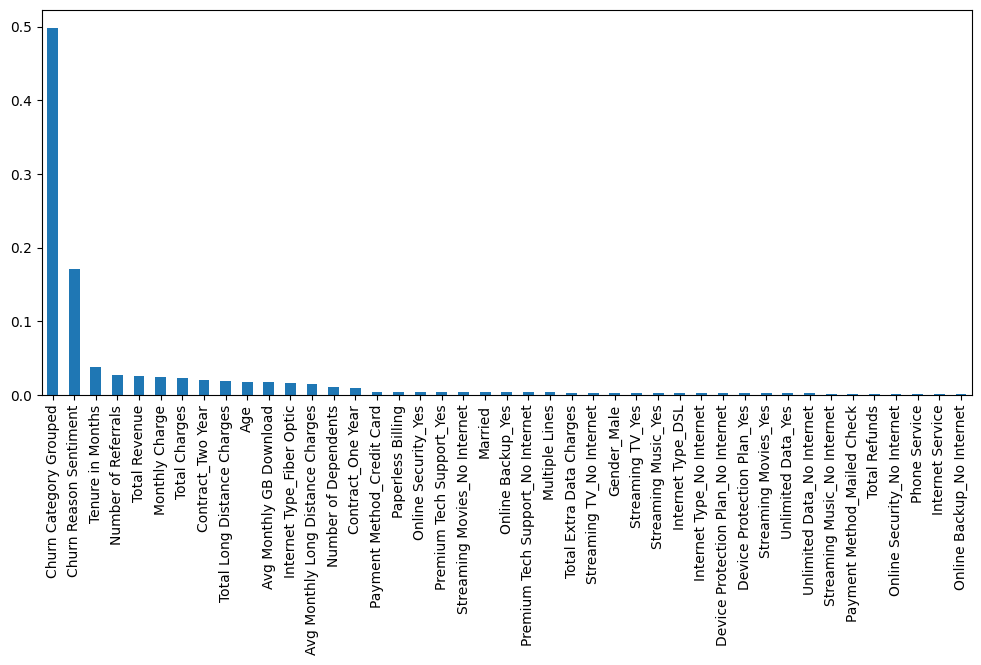

In [368]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))

In [369]:
low_importance_features = importances[importances < 0.01].index
X_train_new = X_train.drop(columns=low_importance_features)
X_test_new = X_test.drop(columns=low_importance_features)


In [370]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3793 to 5679
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5634 non-null   float64
 1   Number of Dependents               5634 non-null   int64  
 2   Number of Referrals                5634 non-null   int64  
 3   Tenure in Months                   5634 non-null   float64
 4   Avg Monthly Long Distance Charges  5634 non-null   float64
 5   Avg Monthly GB Download            5634 non-null   float64
 6   Monthly Charge                     5634 non-null   float64
 7   Total Charges                      5634 non-null   float64
 8   Total Long Distance Charges        5634 non-null   float64
 9   Total Revenue                      5634 non-null   float64
 10  Contract_Two Year                  5634 non-null   int64  
 11  Internet Type_Fiber Optic          5634 non-null   int64  

In [376]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_new, y_train)

RandomForestClassifier(random_state=42)

In [378]:
y_pred = rf_model.predict(X_test_new)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9716
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1035
           1       1.00      0.89      0.94       374

    accuracy                           0.97      1409
   macro avg       0.98      0.95      0.96      1409
weighted avg       0.97      0.97      0.97      1409

[[1035    0]
 [  40  334]]


In [379]:
import joblib

In [380]:
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [382]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 3793 to 5679
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5634 non-null   float64
 1   Number of Dependents               5634 non-null   int64  
 2   Number of Referrals                5634 non-null   int64  
 3   Tenure in Months                   5634 non-null   float64
 4   Avg Monthly Long Distance Charges  5634 non-null   float64
 5   Avg Monthly GB Download            5634 non-null   float64
 6   Monthly Charge                     5634 non-null   float64
 7   Total Charges                      5634 non-null   float64
 8   Total Long Distance Charges        5634 non-null   float64
 9   Total Revenue                      5634 non-null   float64
 10  Contract_Two Year                  5634 non-null   int64  
 11  Internet Type_Fiber Optic          5634 non-null   int64  